In [1]:
import torch
import pickle
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import seaborn as sns
sns.set()
import transfer_learning as tl

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2


/Users/marcglettig/.local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Transfer learning

Use a digit prediction only network to be trained and then included in the final network to give the binary predictions.

In [2]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [ ]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val, all_classified, misclassified  = (
    tl.train_all(train_input, train_target, train_classes,val_input, val_target, val_classes, test_input, 
                 test_target, test_classes,nb_epochs=25))

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.967 
Validation accuracy is 0.914 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.966 
Validation accuracy is 0.906 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.968 
Validation accuracy is 0.914 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.981 
Validation accuracy is 0.928 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.984 
Validation accuracy is 0.926 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.978 
Validation accuracy is 0.928 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.976 
Validation accuracy is 0.938 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.962 
Validation acc

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

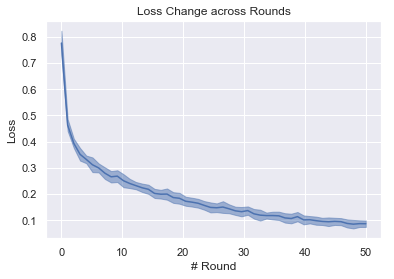

In [28]:
mini_batch_size = 100
plt.figure()
plotloss((losses/(train_input.size(0)/mini_batch_size)).T,color= 'b')
plotloss(losses_val.T,color= 'c')

plt.show()

In [ ]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

In [ ]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

In [ ]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

In [ ]:
plot_performance(accuracies_train,accuracies_test)

In [ ]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
heat_map = plot_heatmap(misclassified,all_classified)

In [ ]:
import pickle
with open(f'produced/TL_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)

In [ ]:
with open(f'produced/TL_heatmap.p', 'wb') as f:
    pickle.dump(heat_map ,f)